In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
aqi = pd.read_csv('c4_epa_air_quality.csv')

In [3]:
aqi.head(10)

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


In [4]:
# group states of interest for data analysis
RREstates = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']
subset = aqi.loc[aqi['state_name'].isin(RREstates)]

subset.groupby(['state_name']).agg({"aqi":"mean","state_name":"count"})

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


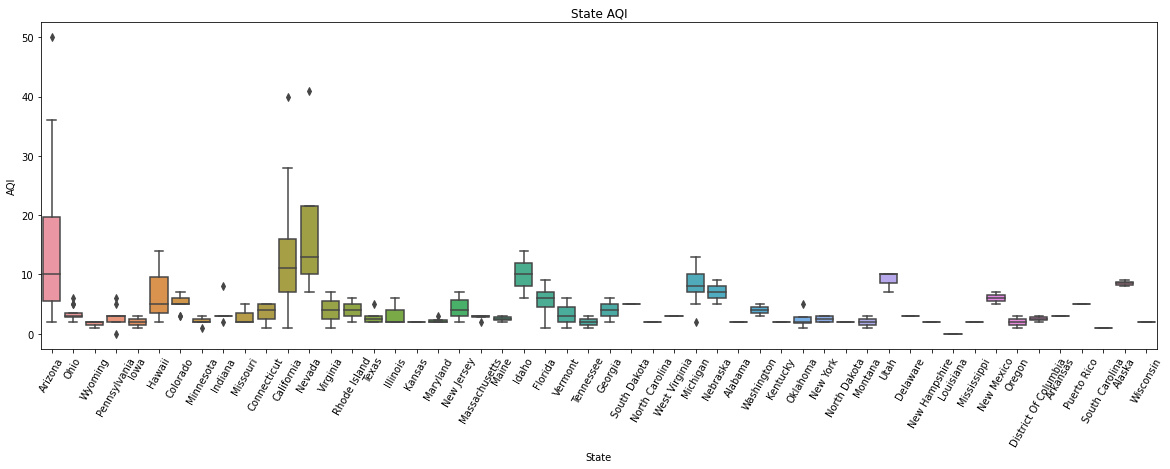

In [5]:
plt.figure(figsize=(20, 6))
ax = sns.boxplot(data = aqi, x='state_name', y="aqi")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.title('State AQI')
plt.xlabel("State")
plt.ylabel("AQI")
plt.show()

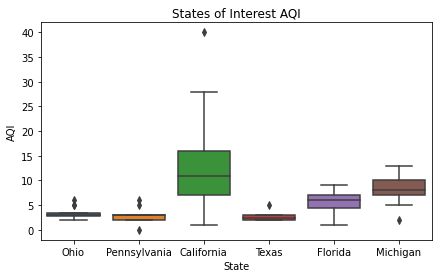

In [6]:
plt.figure(figsize=(7, 4))
ax = sns.boxplot(data = subset, x='state_name', y="aqi")
plt.title('States of Interest AQI')
plt.xlabel("State")
plt.ylabel("AQI")
plt.show()

In [7]:
# sampling California AQI and generating a confidence interval of sampled mean AQI
aqi_ca = aqi[aqi['state_name']=='California']
sampled_aqi = aqi_ca.sample(n=30, replace=True, random_state=100)

sample_mean = sampled_aqi['aqi'].mean()

confidence_level = .95
z_value = 1.96

standard_error = sampled_aqi['aqi'].std() / np.sqrt(sampled_aqi.shape[0])

In [8]:
confidence_interval = stats.norm.interval(alpha=confidence_level, loc=sample_mean, scale=standard_error)

print("Lower and upper bound AQI of California with 95% confidence is", confidence_interval, "\n")
print("Actual California mean AQI", round(aqi_ca['aqi'].mean(), 3))
print("Sample California mean AQI", sample_mean)

Lower and upper bound AQI of California with 95% confidence is (9.94101362316018, 14.658986376839822) 

Actual California mean AQI 12.121
Sample California mean AQI 12.3
